Akshay: elastic net, SVM
  
Jørgen: LDA, random forests (decision trees)

In [168]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("telco_train.csv", index_col=0)
df_test = pd.read_csv("telco_test.csv", index_col=0)

### Feature Selection and Engineering

In [55]:
df.head(10)

,gender,senior,partner,dependents,tenure,phone,multiple_lines,online_security,online_backup,device_protection,...,total_charges,internet_dsl,internet_fiber,contract_1_yr,contract_2_yr,payment_credit_card,payment_electronic_check,payment_mailed_check,churn,average_charges
2142,0,0,0,1,21,1,0,1,0,1,...,1336.80,1,0,1,0,0,0,1,0,63.657143
1623,0,0,0,0,54,1,1,0,1,0,...,5129.45,0,1,0,1,0,0,0,0,94.989815
6074,1,0,1,0,1,0,0,0,0,0,...,23.45,1,0,0,0,0,1,0,1,23.450000
1362,1,0,0,0,4,1,0,0,0,0,...,237.95,0,1,0,0,0,1,0,1,59.487500
6754,1,0,0,1,0,1,1,1,1,0,...,0.00,1,0,0,1,0,0,0,0,0.000000
1212,1,0,0,0,7,1,0,0,0,0,...,521.35,0,1,0,0,0,1,0,0,74.478571
2722,1,0,1,1,32,1,0,0,0,0,...,613.95,0,0,0,1,0,0,1,0,19.185938
4006,1,0,1,1,72,1,0,0,0,0,...,1414.65,0,0,0,1,1,0,0,0,19.647917
6791,1,0,0,0,19,0,0,0,0,1,...,733.35,1,0,0,0,0,1,0,1,38.597368
5466,1,0,0,1,10,1,0,0,0,0,...,219.50,0,0,1,0,0,0,0,0,21.950000


In [148]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'internet_dsl',
       'internet_fiber', 'contract_1_yr', 'contract_2_yr',
       'payment_credit_card', 'payment_electronic_check',
       'payment_mailed_check', 'churn', 'average_charges', 'single_parent',
       'lonely_senior', 'repeat_renewer'],
      dtype='object')

In [152]:
# Adding feature for average charges by tenure

df["average_charges"] = df.apply(lambda x: 0.0 if int(x["tenure"])==0 else x["total_charges"]/float(x["tenure"]), axis=1)
df_test["average_charges"] = df_test.apply(lambda x: 0.0 if int(x["tenure"])==0 else x["total_charges"]/float(x["tenure"]), axis=1)

df["single_parent"] = df.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])!=0) else 0, axis=1)
df_test["single_parent"] = df_test.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])!=0) else 0, axis=1)

df["lonely_senior"] = df.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])==0 and int(x['senior'])==1) else 0, axis=1)
df_test["lonely_senior"] = df_test.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])==0 and int(x['senior'])==1) else 0, axis=1)

df["repeat_renewer"] = df.apply(lambda x: 1 if (int(x['tenure'])>12 and int(x['contract_1_yr'])==0 and int(x['contract_2_yr'])==0) else 0, axis=1)
df_test["repeat_renewer"] = df_test.apply(lambda x: 1 if (int(x['tenure'])>12 and int(x['contract_1_yr'])==0 and int(x['contract_2_yr'])==0) else 0, axis=1)

df["total_fam"] = df.apply(lambda x: int(x['partner']) + int(x['dependents']) + 1, axis=1)
df_test["total_fam"] = df_test.apply(lambda x: int(x['partner']) + int(x['dependents']) + 1, axis=1)

print(np.mean(df["total_fam"]))

1.783280085197018


In [153]:
X = df.drop(["churn"], axis=1)
#y = pd.reset_index(df.churn)
y = df.churn.reset_index().churn

X_test = df_test.drop(["churn"], axis=1)
y_test = df_test.churn.reset_index().churn

In [154]:
X = X.astype(np.float64)
X_test = X_test.astype(np.float64)
Xu = X.values
Xu_test = X_test.values

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [156]:
#Split for Cross Validation

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [9]:
from sklearn.metrics import f1_score, roc_auc_score, log_loss 

In [64]:
from sklearn.feature_selection import RFE

Prior to Running models, we can set a baseline by calculating the null accuracy

In [106]:
1-np.mean(y)

0.7344692935747249

### Logistic Regression Models

In [157]:
# Simple Logistic Regression

from sklearn.linear_model import LogisticRegression 

logreg_basic = LogisticRegression(solver="lbfgs", random_state=0)
logreg_basic.fit(X, y)
print("Accuracy of Logistic Regression on training set: {:.2f}".format(logreg_basic.score(X, y)))
print("Accuracy of Logistic Regression on test set: {:.2f}".format(logreg_basic.score(X_test, y_test)))

# Generalized Error

gen_error_lrb = list()
f1_lrb = list()
ra_lrb = list()
ll_lrb = list()

for train_index, test_index in kf.split(X):
    logreg_basic_gen = LogisticRegression(solver="lbfgs", random_state=0)
    logreg_basic_gen.fit(X[train_index], y[train_index])
    gen_error_lrb.append(logreg_basic_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_basic_gen.predict(X[test_index])
    f1_lrb.append(f1_score(y[test_index],y_pred))
    ra_lrb.append(roc_auc_score(y[test_index],y_pred))
    ll_lrb.append(log_loss(y[test_index],y_pred))
    
print(np.mean(gen_error_lrb))
print(np.mean(f1_lrb))
print(np.mean(ra_lrb))
#print(np.mean(ll_lrb))
#print(log_loss(y,logreg_basic.predict(X)))

Accuracy of Logistic Regression on training set: 0.80
Accuracy of Logistic Regression on test set: 0.81
0.7994290339241401
0.5712763973228642
0.7059542035844095


In [158]:
# Testing RFE

selector = RFE(logreg_basic, step=1)
selector.fit(X,y)

selector.score(X,y)

0.8031593894213702

In [159]:
## https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d

from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class LogisticReg:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

In [14]:
lr1 = LogisticReg(solver="lbfgs", random_state=0)
lr1.fit(X,y)
z = lr1.z_scores
p = lr1.p_values
zipped = list(zip(list(features), z, p))
lr1_summary = pd.DataFrame(zipped)
lr1_summary

NameError: name 'features' is not defined

In [171]:
# Ridge Logistic Regression

from sklearn.linear_model import LogisticRegression 

logreg_ridge = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2")
logreg_ridge.fit(X, y)
print("Accuracy of Ridge Logistic Regression on training set: {:.2f}".format(logreg_ridge.score(X, y)))
print("Accuracy of Ridge Logistic Regression on test set: {:.2f}".format(logreg_ridge.score(X_test, y_test)))


# Estimating Ridge Parameter

best_c_ridge = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2", C=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_ridge=c

print(best_c_ridge)

# Generalized Error

gen_error_lrr = list()
f1_lrr = list()
ra_lrr = list()

for train_index, test_index in kf.split(X):
    logreg_ridge_gen = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2", C=best_c_ridge)
    logreg_ridge_gen.fit(X[train_index], y[train_index])
    gen_error_lrr.append(logreg_ridge_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_ridge_gen.predict(X[test_index])
    f1_lrr.append(f1_score(y[test_index],y_pred))
    ra_lrr.append(roc_auc_score(y[test_index],y_pred))

print(np.mean(gen_error_lrr))
print(np.mean(f1_lrr))
print(np.mean(ra_lrr))

Accuracy of Ridge Logistic Regression on training set: 0.80
Accuracy of Ridge Logistic Regression on test set: 0.81
0.08
0.8012030283561972
0.5732844092701364
0.7070690956857325


In [173]:
# Lasso Logistic Regression

from sklearn.linear_model import LogisticRegression 

logreg_lasso = LogisticRegression(solver='saga', random_state=0, penalty="l1")
logreg_lasso.fit(X, y)
print("Accuracy of Lasso Logistic Regression on training set: {:.2f}".format(logreg_lasso.score(X, y)))
print("Accuracy of Lasso Logistic Regression on test set: {:.2f}".format(logreg_lasso.score(X_test, y_test)))

# Estimating Lasso Parameter

best_c_lasso = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = LogisticRegression(solver="saga", random_state=0, penalty="l1", C=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_lasso=c

print(best_c_lasso)

# Generalized Error

gen_error_lrl = list()
f1_lrl = list()
ra_lrl = list()

for train_index, test_index in kf.split(X):
    logreg_lasso_gen = LogisticRegression(solver="saga", random_state=0, penalty="l2", C=best_c_lasso)
    logreg_lasso_gen.fit(X[train_index], y[train_index])
    gen_error_lrl.append(logreg_lasso_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_lasso_gen.predict(X[test_index])
    f1_lrl.append(f1_score(y[test_index],y_pred))
    ra_lrl.append(roc_auc_score(y[test_index],y_pred))
    
print(np.mean(gen_error_lrl))
print(np.mean(f1_lrl))
print(np.mean(ra_lrl))

Accuracy of Lasso Logistic Regression on training set: 0.80
Accuracy of Lasso Logistic Regression on test set: 0.81
0.07
0.8010254084627692
0.5723260400530068
0.7065065819075745


### Discriminant analysis
Assumes multivariate Gaussian distributions, while we have a majority of binary variables. Skip.

#### LDA  

In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
print("Accuracy of LDA on training set: {:.2f}".format(lda.score(X, y)))
print("Accuracy of LDA on test set: {:.2f}".format(lda.score(X_test, y_test)))

# Generalized Error

gen_error_lda = list()
f1_lda = list()
ra_lda = list()


for train_index, test_index in kf.split(X):
    lda_gen = LinearDiscriminantAnalysis()
    lda_gen.fit(X[train_index], y[train_index])
    gen_error_lda.append(lda_gen.score(X[test_index], y[test_index]))
    y_pred = lda_gen.predict(X[test_index])
    f1_lda.append(f1_score(y[test_index],y_pred))
    ra_lda.append(roc_auc_score(y[test_index],y_pred))

print("Generalized Error on LDA: ",np.mean(gen_error_lda))
print("F1 score on LDA: ",np.mean(f1_lda))
print("ROC-AUC Score on LDA: ",np.mean(ra_lda))

Accuracy of LDA on training set: 0.80
Accuracy of LDA on test set: 0.81
Generalized Error on LDA:  0.7988958593149669
F1 score on LDA:  0.5710837633952383
ROC-AUC Score on LDA:  0.7060737173292818


#### QDA

In [175]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
print("Accuracy of QDA on traning set: {:.2f}".format(qda.score(X, y)))
print("Accuracy of QDA on test set: {:.2f}".format(qda.score(X_test, y_test)))

# Generalized Error

gen_error_qda = list()
f1_qda = list()
ra_qda = list()

for train_index, test_index in kf.split(X):
    qda_gen = QuadraticDiscriminantAnalysis()
    qda_gen.fit(X[train_index], y[train_index])
    gen_error_qda.append(qda_gen.score(X[test_index], y[test_index]))
    y_pred = qda_gen.predict(X[test_index])
    f1_qda.append(f1_score(y[test_index],y_pred))
    ra_qda.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on QDA: ",np.mean(gen_error_qda))
print("F1 Score on QDA: ",np.mean(f1_qda))
print("ROC-AUC Score on QDA: ",np.mean(ra_qda))

Accuracy of QDA on traning set: 0.74
Accuracy of QDA on test set: 0.74
Generalized Error on QDA:  0.7273666906012624
F1 Score on QDA:  0.6052680690279306
ROC-AUC Score on QDA:  0.7477866698745134


In [176]:
# Estimating QDA regularization Parameter

best_c_qda = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = QuadraticDiscriminantAnalysis(reg_param=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_qda=c

print(best_c_qda)

# Generalized Error

gen_error_qda = list()
f1_qda = list()
ra_qda = list()

for train_index, test_index in kf.split(X):
    qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)
    qda_gen.fit(X[train_index], y[train_index])
    gen_error_qda.append(qda_gen.score(X[test_index], y[test_index]))
    y_pred = qda_gen.predict(X[test_index])
    f1_qda.append(f1_score(y[test_index],y_pred))
    ra_qda.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on QDA: ",np.mean(gen_error_qda))
print("F1 Score on QDA: ",np.mean(f1_qda))
print("ROC-AUC Score on QDA: ",np.mean(ra_qda))

0.81
Generalized Error on QDA:  0.7738675157149515
F1 Score on QDA:  0.6031140044398728
ROC-AUC Score on QDA:  0.7342575950730985


## Decision Tree

In [94]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier().fit(X, y)

print("Accuracy of Decision Tree classifier on training set: {:.2f}".format(dtc.score(X, y)))
print("Accuracy of Decision Tree classifier on test set: {:.2f}".format(dtc.score(X_test, y_test)))

# Generalized Error
gen_error_dt = list()

for train_index, test_index in kf.split(X):
    dt_gen = tree.DecisionTreeClassifier()
    dt_gen.fit(X[train_index], y[train_index])
    gen_error_dt.append(dt_gen.score(X[test_index], y[test_index]))
    
print("Generalized Error on Decision Tree: ",np.mean(gen_error_dt))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.71
Generalized Error on Decision Tree:  0.7216844286560095


In [ ]:
# import graphviz
# viz = tree.export_graphviz(dtc, out_file=None, 
#                            feature_names=cols)
# graph = graphviz.Source(viz)
# graph.render("viz3")

## K-Nearest Neighbors

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X, y)

print("Accuracy of KNN classifier on training set: {:.2f}".format(knn.score(X, y)))
print("Accuracy of KNN classifier on test set: {:.2f}".format(knn.score(X_test, y_test)))


# Generalized Error
gen_error_knn = list()
f1_knn = list()
ra_knn = list()


for train_index, test_index in kf.split(X):
    knn_gen = KNeighborsClassifier()
    knn_gen.fit(X[train_index], y[train_index])
    gen_error_knn.append(knn_gen.score(X[test_index], y[test_index]))
    y_pred = knn_gen.predict(X[test_index])
    f1_knn.append(f1_score(y[test_index],y_pred))
    ra_knn.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on K Nearest Neighbour: ",np.mean(gen_error_knn))
print("F1 Score on K Nearest Neighbour: ",np.mean(f1_knn))
print("ROC-AUC Score on K Nearest Neighbour: ",np.mean(ra_knn))


Accuracy of KNN classifier on training set: 0.83
Accuracy of KNN classifier on test set: 0.77
Generalized Error on K Nearest Neighbour:  0.7532802993084162
F1 Score on K Nearest Neighbour:  0.5183696406433148
ROC-AUC Score on K Nearest Neighbour:  0.673015287041028


## Gaussian Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X, y)

print("Accuracy of GNB classifier on training set: {:.2f}".format(gnb.score(X, y)))
print("Accuracy of GNB classifier on test set: {:.2f}".format(gnb.score(X_test, y_test)))


# Generalized Error

gen_error_gnb = list()
f1_gnb = list()
ra_gnb = list()

for train_index, test_index in kf.split(X):
    gnb_gen = GaussianNB()
    gnb_gen.fit(X[train_index], y[train_index])
    gen_error_gnb.append(gnb_gen.score(X[test_index], y[test_index]))
    y_pred = gnb_gen.predict(X[test_index])
    f1_gnb.append(f1_score(y[test_index],y_pred))
    ra_gnb.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on Gaussian Naive Bayes: ",np.mean(gen_error_gnb))
print("F1 Score on Gaussian Naive Bayes: ",np.mean(f1_gnb))
print("ROC-AUC Score on Gaussian Naive Bayes: ",np.mean(ra_gnb))


Accuracy of GNB classifier on training set: 0.76
Accuracy of GNB classifier on test set: 0.78
Generalized Error on Gaussian Naive Bayes:  0.7547015733847297
F1 Score on Gaussian Naive Bayes:  0.6008011378571447
ROC-AUC Score on Gaussian Naive Bayes:  0.7367622219679558


## Support Vector Machine

In [97]:
from sklearn.svm import SVC 

svm = SVC().fit(X, y)

print("Accuracy of SVM classifier on training set: {:.2f}".format(svm.score(X, y)))
print("Accuracy of SVM classifier on test set: {:.2f}".format(svm.score(X_test, y_test)))


# Generalized Error

gen_error_svm = list()
f1_svm = list()
ra_svm = list()


for train_index, test_index in kf.split(X):
    svm_gen = SVC()
    svm_gen.fit(X[train_index], y[train_index])
    gen_error_svm.append(svm_gen.score(X[test_index], y[test_index]))
    y_pred = svm_gen.predict(X[test_index])
    f1_svm.append(f1_score(y[test_index],y_pred))
    ra_svm.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on Support Vector Machine: ",np.mean(gen_error_svm))
print("F1 Score on Support Vector Machine: ",np.mean(f1_svm))
print("ROC-AUC Score on Support Vector Machine: ",np.mean(ra_svm))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.81
Generalized Error on Support Vector Machine:  0.7930394416940654
F1 Score on Support Vector Machine:  0.5481000836959161
ROC-AUC Score on Support Vector Machine:  0.6912129842434613


## RBF SVM

In [ ]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF

# rbf = GaussianProcessClassifier(1.0 * RBF(1.0))
# rbf.fit(X, y)

# print("Accuracy of RBF SVM classifier on training set: {:.2f}".format(rbf.score(X, y)))
# print("Accuracy of RBF SVM classifier on test set: {:.2f}".format(rbf.score(X_test, y_test)))

## Random Forests

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

print("Accuracy of Random Forests classifier on training set: {:.2f}".format(rfc.score(X, y)))
print("Accuracy of Random Forests classifier on test set: {:.2f}".format(rfc.score(X_test, y_test)))

# Generalized Error
gen_error_rf = list()
f1_rf = list()
ra_rf = list()


for train_index, test_index in kf.split(X):
    rf_gen = RandomForestClassifier()
    rf_gen.fit(X[train_index], y[train_index])
    gen_error_rf.append(rf_gen.score(X[test_index], y[test_index]))
    y_pred = svm_gen.predict(X[test_index])
    f1_rf.append(f1_score(y[test_index],y_pred))
    ra_rf.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on Random Forests: ",np.mean(gen_error_rf))
print("F1 Score on Random Forests: ",np.mean(f1_rf))
print("ROC AUC Score on Random Forests: ",np.mean(ra_rf))

Accuracy of Random Forests classifier on training set: 0.98
Accuracy of Random Forests classifier on test set: 0.79
Generalized Error on Random Forests:  0.7790143985488077
F1 Score on Random Forests:  0.6088578200873603
ROC AUC Score on Random Forests:  0.7278069098782856


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 100)] # Number of trees in forest
max_features = ['auto'] # Number of features considered at each split
max_depth = [int(x) for x in np.linspace(1, 110, num = 100)] # Max levels in the tree
min_samples_split = [2, 5, 10] # Min number of samples required to split a node, 
min_samples_leaf = [1, 2, 3] # Min number of samples required at each leaf node
bootstrap = [True, False] # Bootstrapped sample selection

random_grid = {'n_estimators':n_estimators, 
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

In [46]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 50, cv = 3, verbose = 2, random_state = 42,
                               n_jobs = -1)

rf_random.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 412, 432, 452, 472, 492, 512, 532, 552, 572, 592, 613, 633, 653, 673, 693, 713, 733, 753, 773, 793, 814, 834, 854, 874, 894, 914, 934, 954, 974, 994, 1015, 1035, 1055,...8, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]},
          pre_dis

In [50]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=67, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1738, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
# Generalized Error
gen_error_rf = list()

for train_index, test_index in kf.split(X):
    rf_best = rf_random.best_estimator_
    rf_best.fit(X[train_index], y[train_index])
    gen_error_rf.append(rf_best.score(X[test_index], y[test_index]))
    
print("Generalized Error on Random Forests: ",np.mean(gen_error_rf))

Generalized Error on Random Forests:  0.8006679641736897


In [ ]:
from sklearn.model_selection import GridSearchCV

In [61]:
rf_best.score(X_test, y_test)

0.8062455642299503

In [62]:
from sklearn.metrics import roc_curve, auc

rf_y_pred = rf_best.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6949561108408294

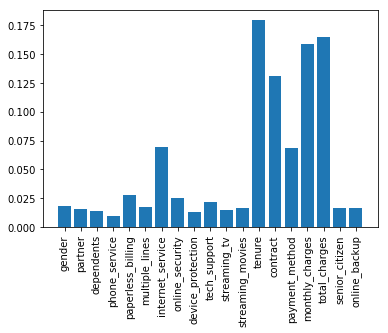

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = list(rf_best.feature_importances_)
x_values = list(range(len(importances)))
plt.bar(x_values, importances)
features_list = df.columns.values[1:-1]
plt.xticks(x_values, features_list, rotation = 'vertical')
plt.show()

## AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X, y)

print("Accuracy of AdaBoost classifier on training set: {:.2f}".format(ada.score(X, y)))
print("Accuracy of AdaBoost classifier on test set: {:.2f}".format(ada.score(X_test, y_test)))
####

# Generalized Error

gen_error_ab = list()

for train_index, test_index in kf.split(X):
    ab_gen = AdaBoostClassifier()
    ab_gen.fit(X[train_index], y[train_index])
    gen_error_ab.append(ab_gen.score(X[test_index], y[test_index]))
    
print("Generalized Error on AdaBoost: ",np.mean(gen_error_ab))

Accuracy of AdaBoost classifier on training set: 0.80
Accuracy of AdaBoost classifier on test set: 0.81
Generalized Error on AdaBoost:  0.7964094957358628


## Neural Net

In [99]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1)
mlp.fit(X, y)

print("Accuracy of MLP classifier on training set: {:.2f}".format(mlp.score(X, y)))
print("Accuracy of MLP classifier on test set: {:.2f}".format(mlp.score(X_test, y_test)))


# Generalized Error

gen_error_nn = list()

for train_index, test_index in kf.split(X):
    nn_gen = MLPClassifier(alpha=1)
    nn_gen.fit(X[train_index], y[train_index])
    gen_error_nn.append(nn_gen.score(X[test_index], y[test_index]))
    
print("Generalized Error on NN: ",np.mean(gen_error_nn))

Accuracy of MLP classifier on training set: 0.81
Accuracy of MLP classifier on test set: 0.82
Generalized Error on NN:  0.7972994847763374


### Tuning Hyperparameter of Neural Net to Maximise Generalized Score

In [100]:
# Estimating Hyper-Parameter

best_alpha = 0
best_score = 0

for i in range(1,6):
    c = (i/5)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = MLPClassifier(alpha=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_alpha=c

print(best_alpha)
print(best_score)

/Users/akshaysundar/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/akshaysundar/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/akshaysundar/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/akshaysundar/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

1.0
0.7983642593502387


In [101]:
# Generalized Error

gen_error_nn = list()
f1_nn = list()
ra_nn = list()

for train_index, test_index in kf.split(X):
    nn_gen = MLPClassifier(alpha=best_alpha)
    nn_gen.fit(X[train_index], y[train_index])
    gen_error_nn.append(nn_gen.score(X[test_index], y[test_index]))
    y_pred = nn_gen.predict(X[test_index])
    f1_nn.append(f1_score(y[test_index],y_pred))
    ra_nn.append(roc_auc_score(y[test_index],y_pred))
    
print("Generalized Error on MLP with tuned Hyperparameter: ",np.mean(gen_error_nn))
print("F1 Score on MLP with tuned Hyperparameter: ",np.mean(f1_nn))
print("ROC-AUC Score on MLP with tuned Hyperparameter: ",np.mean(ra_nn))

Generalized Error on MLP with tuned Hyperparameter:  0.7990731642795057
F1 Score on MLP with tuned Hyperparameter:  0.5734963523285469
ROC-AUC Score on MLP with tuned Hyperparameter:  0.7071452827915458


# Compare Model Performances

### Cross Validation Error

In [177]:
print("Logistic Regression: ",np.mean(gen_error_lrb))
print("Ridge Regression: ",np.mean(gen_error_lrr))
print("Lasso Regression: ",np.mean(gen_error_lrl))
print("LDA: ",np.mean(gen_error_lda))
print("QDA: ",np.mean(gen_error_qda))
print("Decision Tree: ",np.mean(gen_error_dt))
print("K Nearest Neighbour: ",np.mean(gen_error_knn))
print("Gaussian Naive Bayes: ",np.mean(gen_error_gnb))
print("SVM: ",np.mean(gen_error_svm))
print("Random Forests: ",np.mean(gen_error_rf))
print("MLP: ",np.mean(gen_error_nn))

Logistic Regression:  0.7994290339241401
Ridge Regression:  0.8012030283561972
Lasso Regression:  0.8010254084627692
LDA:  0.7988958593149669
QDA:  0.7738675157149515
Decision Tree:  0.7216844286560095
K Nearest Neighbour:  0.7532802993084162
Gaussian Naive Bayes:  0.7547015733847297
SVM:  0.7930394416940654
Random Forests:  0.7790143985488077
MLP:  0.7990731642795057


### F1 Score

In [179]:
print("Logistic Regression: ",np.mean(f1_lrb))
print("Ridge Regression: ",np.mean(f1_lrr))
print("Lasso Regression: ",np.mean(f1_lrl))
print("LDA: ",np.mean(f1_lda))
print("QDA: ",np.mean(f1_qda))
print("K Nearest Neighbour: ",np.mean(f1_knn))
print("Gaussian Naive Bayes: ",np.mean(f1_gnb))
print("SVM: ",np.mean(f1_svm))
print("Random Forests: ",np.mean(f1_rf))
print("MLP: ",np.mean(f1_nn))

Logistic Regression:  0.5712763973228642
Ridge Regression:  0.5732844092701364
Lasso Regression:  0.5723260400530068
LDA:  0.5710837633952383
QDA:  0.6031140044398728
K Nearest Neighbour:  0.5183696406433148
Gaussian Naive Bayes:  0.6008011378571447
SVM:  0.5481000836959161
Random Forests:  0.6088578200873603
MLP:  0.5734963523285469


### ROC AUC Score

In [180]:
print("Logistic Regression: ",np.mean(ra_lrb))
print("Ridge Regression: ",np.mean(ra_lrr))
print("Lasso Regression: ",np.mean(ra_lrl))
print("LDA: ",np.mean(ra_lda))
print("QDA: ",np.mean(ra_qda))
print("K Nearest Neighbour: ",np.mean(ra_knn))
print("Gaussian Naive Bayes: ",np.mean(ra_gnb))
print("SVM: ",np.mean(ra_svm))
print("Random Forests: ",np.mean(ra_rf))
print("MLP: ",np.mean(ra_nn))


Logistic Regression:  0.7059542035844095
Ridge Regression:  0.7070690956857325
Lasso Regression:  0.7065065819075745
LDA:  0.7060737173292818
QDA:  0.7342575950730985
K Nearest Neighbour:  0.673015287041028
Gaussian Naive Bayes:  0.7367622219679558
SVM:  0.6912129842434613
Random Forests:  0.7278069098782856
MLP:  0.7071452827915458


### Tabulated View

In [227]:
models_list = ["Logistic Regression","Ridge Regression","Lasso Regression","Linear Discriminant Analysis",
               "Quadratic Discriminant Analysis","K Nearest Neighbour","Gaussian Naive Bayes",
               "Support Vector Machine","Random Forests","Multi Level Perceptron"]
class_errors = [np.mean(gen_error_lrb),np.mean(gen_error_lrr),np.mean(gen_error_lrl),np.mean(gen_error_lda),
                np.mean(gen_error_qda),np.mean(gen_error_knn),np.mean(gen_error_gnb),np.mean(gen_error_svm),
                np.mean(gen_error_rf),np.mean(gen_error_nn)]
f1_scores_list = [np.mean(f1_lrb),np.mean(f1_lrr),np.mean(f1_lrl),np.mean(f1_lda),np.mean(f1_qda),np.mean(f1_knn),
                  np.mean(f1_gnb),np.mean(f1_svm),np.mean(f1_rf),np.mean(f1_nn)]
ra_scores_list = [np.mean(ra_lrb),np.mean(ra_lrr),np.mean(ra_lrl),np.mean(ra_lda),np.mean(ra_qda),np.mean(ra_knn),
                  np.mean(ra_gnb),np.mean(ra_svm),np.mean(ra_rf),np.mean(ra_nn)]


In [235]:
model_comparison = pd.DataFrame()
model_comparison["Models"] = np.array(models_list)
model_comparison["Classification_Error"] = np.array(class_errors)
model_comparison["F1_Score"] = np.array(f1_scores_list)
model_comparison["ROC_AUC_Score"] = np.array(ra_scores_list)

model_comparison['Classification_Error'] = model_comparison.apply(lambda x: round(x['Classification_Error'],3),axis=1)
model_comparison['F1_Score'] = model_comparison.apply(lambda x: round(x['F1_Score'],3),axis=1)
model_comparison['ROC_AUC_Score'] = model_comparison.apply(lambda x: round(x['ROC_AUC_Score'],3),axis=1)

model_comparison.head(100)

,Models,Classification_Error,F1_Score,ROC_AUC_Score
0,Logistic Regression,0.799,0.571,0.706
1,Ridge Regression,0.801,0.573,0.707
2,Lasso Regression,0.801,0.572,0.707
3,Linear Discriminant Analysis,0.799,0.571,0.706
4,Quadratic Discriminant Analysis,0.774,0.603,0.734
5,K Nearest Neighbour,0.753,0.518,0.673
6,Gaussian Naive Bayes,0.755,0.601,0.737
7,Support Vector Machine,0.793,0.548,0.691
8,Random Forests,0.779,0.609,0.728
9,Multi Level Perceptron,0.799,0.573,0.707


## Plotting ROC for QDA

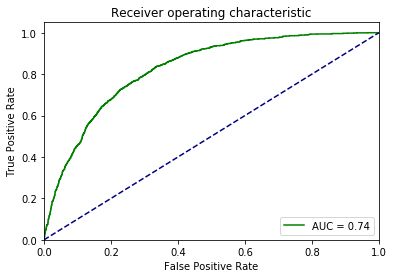

In [188]:
from sklearn.metrics import roc_curve, auc

qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)

qda_gen.fit(X,y)

y_pred = qda_gen.predict_proba(X)
y_pred_actual = qda_gen.predict(X)

res = roc_curve(y,y_pred[:,1], drop_intermediate=False)
roc_auc = roc_auc_score(y,y_pred_actual)

plt.figure()
plt.plot(res[0], res[1], color='green',
        label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - QDA')
plt.legend(loc="lower right")
plt.show()



## ROC AUC for Ridge and LASSO

In [185]:
ridge_gen = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2", C= best_c_ridge)
lasso_gen = LogisticRegression(solver="saga", random_state=0, penalty="l1", C= best_c_lasso)

ridge_gen.fit(X,y)
lasso_gen.fit(X,y)

y_pred_r = ridge_gen.predict_proba(X)
y_pred_actual_r = ridge_gen.predict(X)
y_pred_l = lasso_gen.predict_proba(X)
y_pred_actual_l = lasso_gen.predict(X)


res_r = roc_curve(y,y_pred_r[:,1], drop_intermediate=False)
roc_auc_r = roc_auc_score(y,y_pred_actual_r)

res_l = roc_curve(y,y_pred_l[:,1], drop_intermediate=False)
roc_auc_l = roc_auc_score(y,y_pred_actual_l)


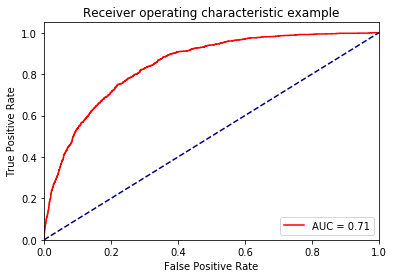

In [189]:
plt.figure()
plt.plot(res_r[0], res_r[1], color='red',
        label = 'AUC = %0.2f' % roc_auc_r)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ridge Regression')
plt.legend(loc="lower right")
plt.show()

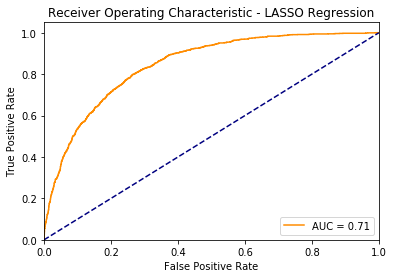

In [190]:
plt.figure()
plt.plot(res_l[0], res_l[1], color='darkorange',
        label = 'AUC = %0.2f' % roc_auc_l)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LASSO Regression')
plt.legend(loc="lower right")
plt.show()

In the model comparison section, the combination of the three factors was taken and the best model was seen to be Quadratic Discriminant Analysis

# Applying QDA Model to Test Data

In [233]:
qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)
qda_gen.fit(X, y)
qda_test_error_score = qda_gen.score(X_test, y_test)
y_pred = qda_gen.predict(X_test)
qda_test_f1_score = f1_score(y_test,y_pred)
qda_test_auc_score = roc_auc_score(y_test,y_pred)
    
print("Test Error on QDA: %0.3f" % qda_test_error_score)
print("Test F1 Score on QDA: %0.3f" % qda_test_f1_score)
print("Test ROC-AUC Score on QDA: %0.3f" % np.mean(ra_qda))

Test Error on QDA: 0.799
Test F1 Score on QDA: 0.653
Test ROC-AUC Score on QDA: 0.734


With a strong F1 Score and ROC area under curve score, the QDA performance has been benchmarked as the best prediction model currently available